# Prediction of PM 2.5 Using RandomForestRegressor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading data
df= pd.read_csv('Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


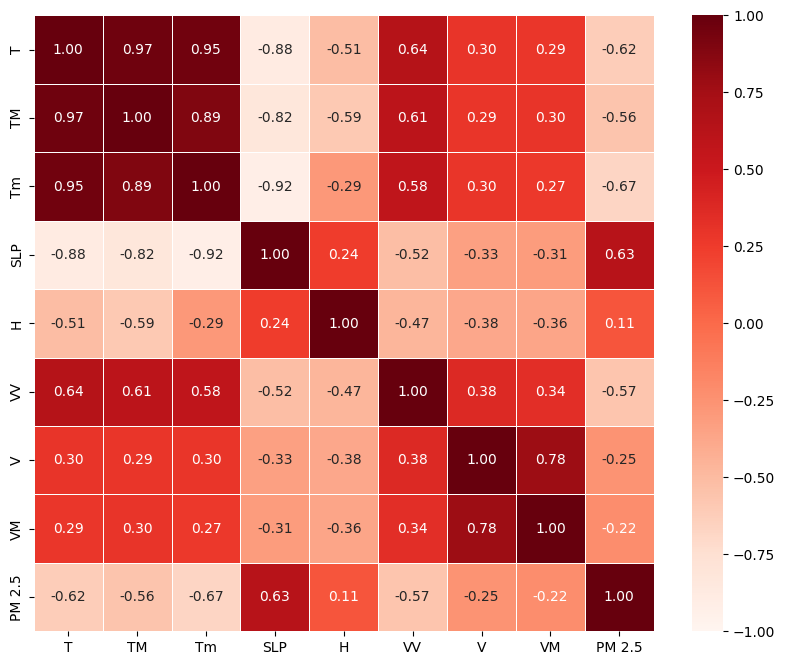

In [20]:
# Correlation
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Reds', 
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,  # Minimum correlation value
    vmax=1    # Maximum correlation value
)
plt.show()


In [4]:
# Missing values
features_with_na= [feature for feature in df.columns if df[feature].isnull().sum()>1]
len(features_with_na)

0

In [5]:
zero_count = (df["PM 2.5"] == 0).sum()
print(zero_count)

36


In [6]:
# There are some instances when the output is zero when inputs are similar to other inputs. So, let's replace these values with mean of other values
# Calculate the mean of non-zero values in the column
non_zero_mean = df.loc[df["PM 2.5"] != 0, "PM 2.5"].mean()
# Replace zeros with the calculated mean
df["PM 2.5"] = df["PM 2.5"].replace(0, non_zero_mean)

In [7]:
zero_count = (df["PM 2.5"] == 0).sum()
print(zero_count)

0


In [8]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967570,0.953703,-0.881698,-0.510593,0.640738,0.302349,0.288292,-0.621831
TM,0.967570,1.000000,0.891970,-0.823447,-0.588017,0.606746,0.293309,0.297590,-0.556225
Tm,0.953703,0.891970,1.000000,-0.917557,-0.288647,0.577382,0.296546,0.267249,-0.672174
SLP,-0.881698,-0.823447,-0.917557,1.000000,0.242307,-0.518015,-0.330155,-0.311231,0.625609
H,-0.510593,-0.588017,-0.288647,0.242307,1.000000,-0.465514,-0.380805,-0.362632,0.111976
VV,0.640738,0.606746,0.577382,-0.518015,-0.465514,1.000000,0.377029,0.342650,-0.565426
V,0.302349,0.293309,0.296546,-0.330155,-0.380805,0.377029,1.000000,0.775715,-0.254507
VM,0.288292,0.297590,0.267249,-0.311231,-0.362632,0.342650,0.775715,1.000000,-0.215295
PM 2.5,-0.621831,-0.556225,-0.672174,0.625609,0.111976,-0.565426,-0.254507,-0.215295,1.000000


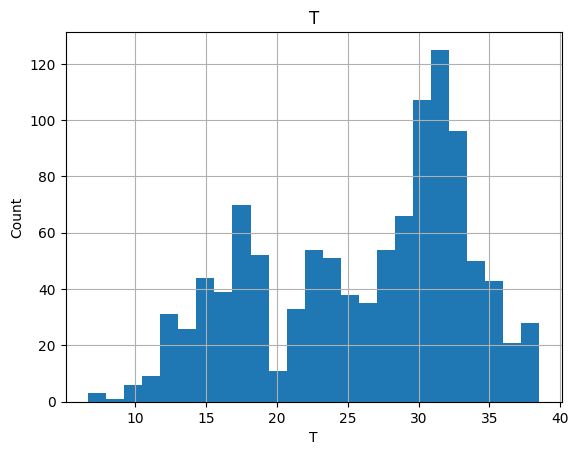

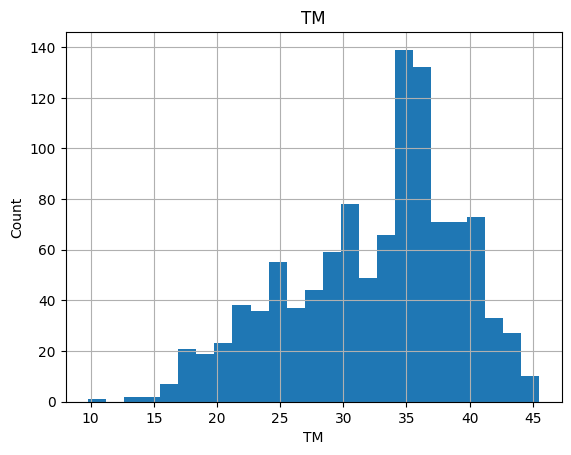

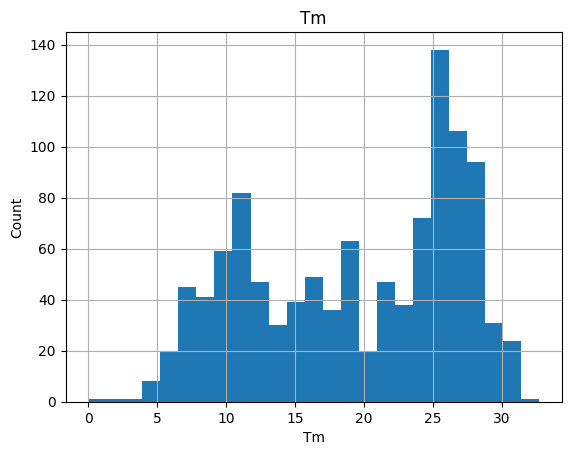

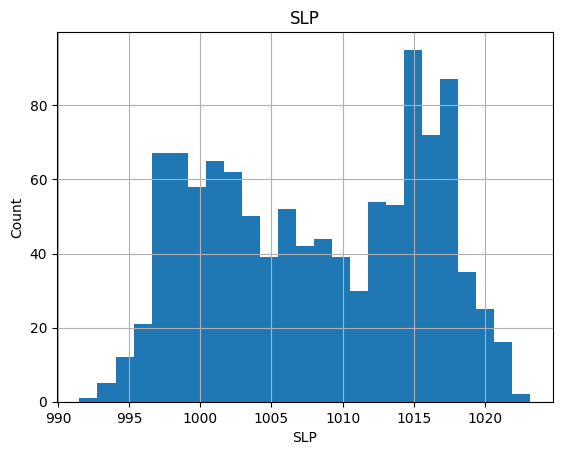

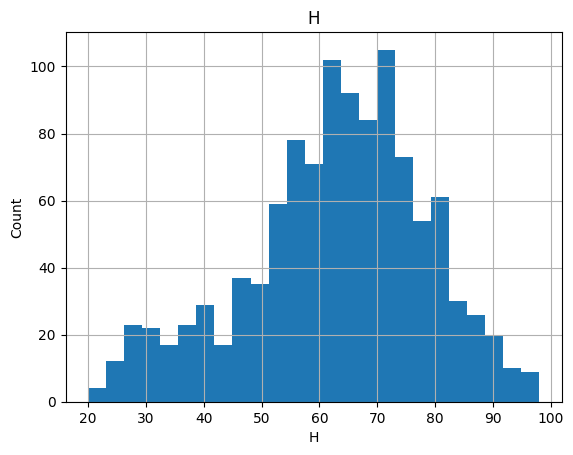

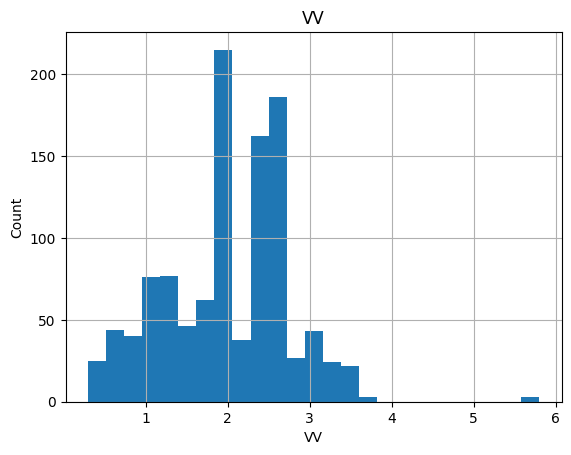

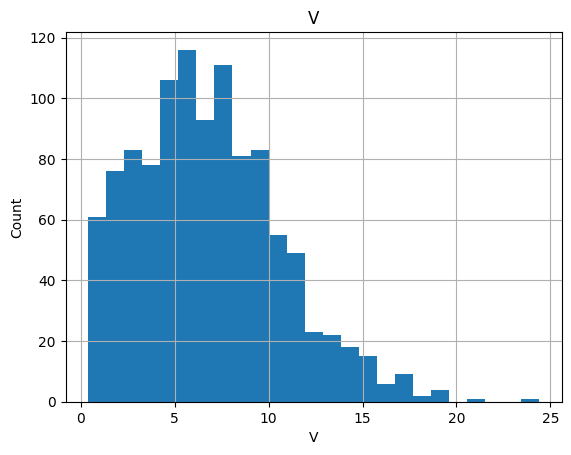

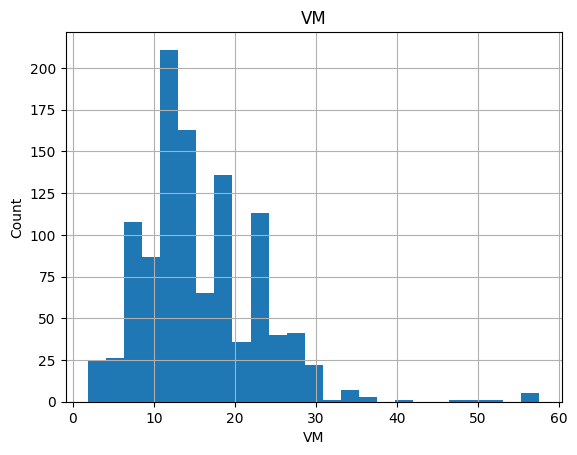

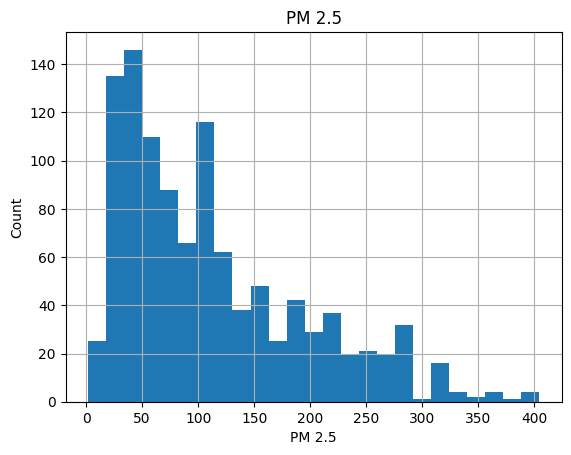

In [9]:
# Lets analyse the values by creating histograms to understand the distribution
for feature in df.columns:
    df=df.copy()
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

# Outliers

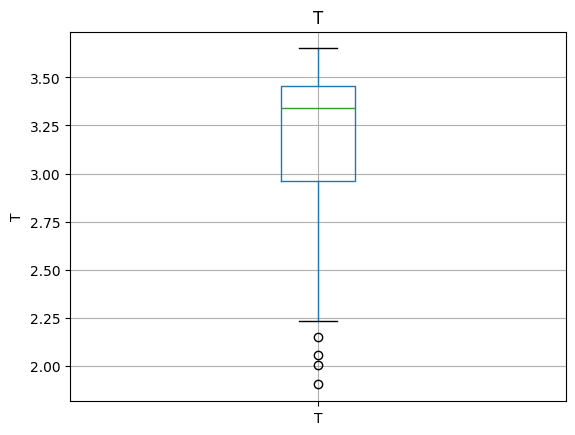

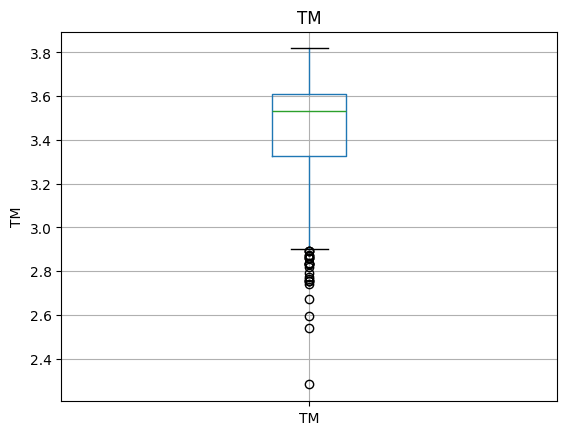

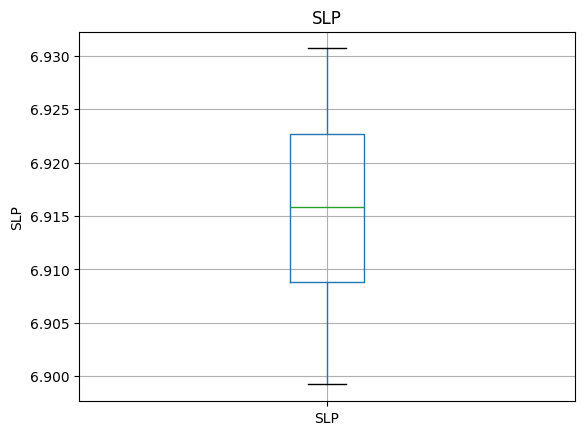

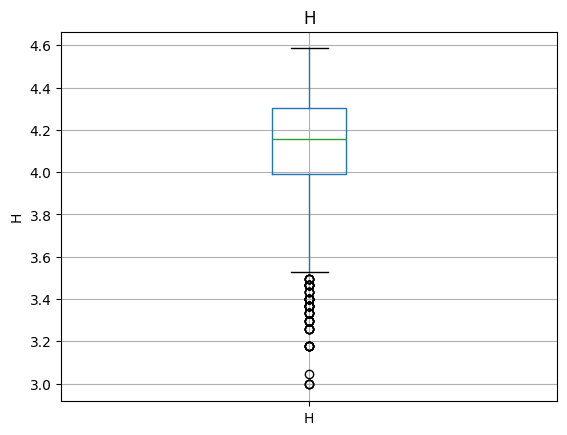

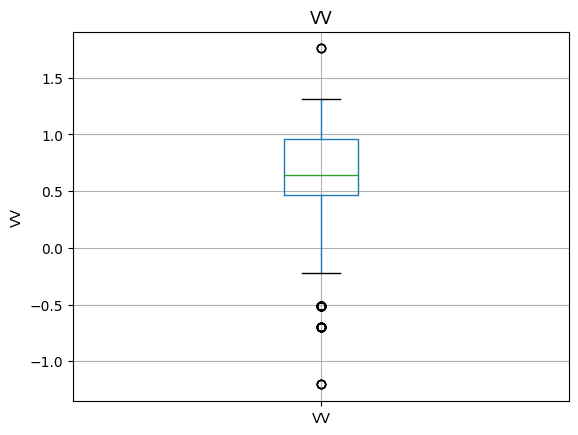

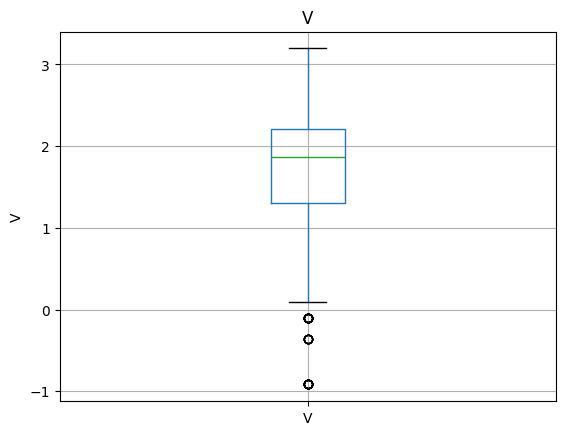

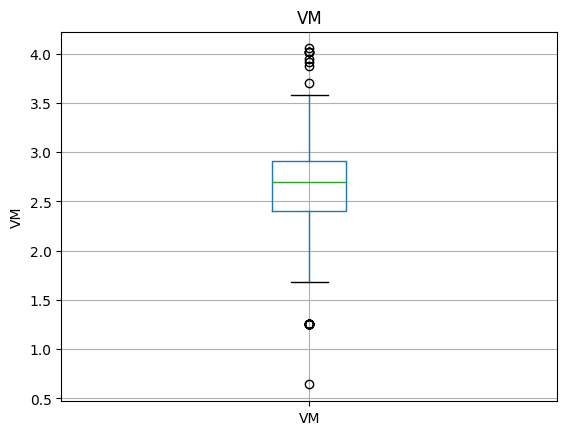

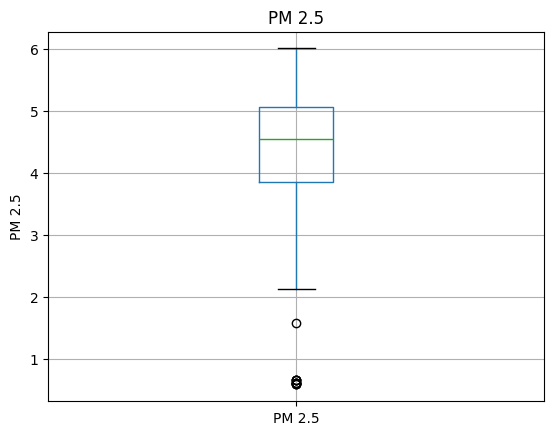

In [10]:
a= df.copy()
for feature in df.columns:
    if 0 in df[feature].unique():
        pass
    else:
        a[feature]= np.log(a[feature])
        a.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

# Feature Scaling

In [11]:
feature_scale= [feature for feature in df.columns if feature not in ['PM 2.5']]
feature_scale

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_standardized = pd.DataFrame(scaler.fit_transform(df[feature_scale]), columns=feature_scale)

print("Standardized Data (Z-Score):")
print(df_standardized)

Standardized Data (Z-Score):
             T        TM        Tm       SLP         H        VV         V  \
0    -2.572437 -3.397570 -1.971716  1.264733  1.915694 -2.011660 -0.638517   
1    -2.517143 -2.963179 -2.025514  1.384321  1.533592 -1.877826 -0.612471   
2    -2.669201 -2.858326 -2.294503  1.503910  1.215174 -1.877826 -0.508288   
3    -2.406556 -2.543768 -2.173458  1.410897  0.578338 -1.610160  0.351226   
4    -1.881265 -1.734903 -2.025514  1.224870 -0.122182 -0.940995  0.507501   
...        ...       ...       ...       ...       ...       ...       ...   
1088 -1.093329 -1.270555 -1.110952  0.972405 -0.440600 -0.271829  2.382805   
1089 -1.134799 -1.120765 -1.178199  1.025555 -0.567967  0.397336  0.689823   
1090 -1.673914 -1.195660 -1.084053  0.919254  2.043061 -1.877826  0.507501   
1091 -1.342151 -1.420344 -1.299244  1.171719  0.960440 -1.208661  0.168905   
1092 -1.342151 -1.360428 -1.406839  1.224870  0.323604 -0.940995  0.273089   

            VM  
0    -0.876803  


In [15]:
# Assigning X, Y values
X= df_standardized
y= df['PM 2.5'] 

In [28]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)

In [24]:
# defining random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(random_state= 42)

In [26]:
from scipy.stats import randint, uniform
# definng the hyperparameter 
param_distributions = {
    'n_estimators': randint(100, 500),       # Number of trees
    'max_depth': [10, 20, 30, None],         # Maximum depth of each tree
    'min_samples_split': randint(2, 10),     # Minimum samples to split a node
    'min_samples_leaf': randint(1, 5),       # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
}


In [29]:
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,               # Number of random combinations to try
    scoring='neg_mean_squared_error',  # Evaluation metric (minimize MSE)
    cv=5,                    # 5-fold cross-validation
    verbose=2,               # Print progress
    random_state=42,         # For reproducibility
    n_jobs=-1                # Use all processors
)

In [30]:
# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029EC3F3E990>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029EC3F3E490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000029EC3F79E80>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
# Output the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation MSE:", -random_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 382}
Best Cross-Validation MSE: 1228.4750397817643


In [62]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model on the test set
X_test = X_test.iloc[:len(y_test)]
# Evaluate the model on the test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set MSE:", mse)
print("Test Set R^2 Score:", r2)

Test Set MSE: 2138.7782592340923
Test Set R^2 Score: 0.6846273040386004


# Comparing to simple linear regression

In [51]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [53]:
y_pred= model.predict(X_test)
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Set MSE:", mse)
print("Test Set R^2 Score:", r2)

Test Set MSE: 3719.764141054718
Test Set R^2 Score: 0.45150366082126525
